<a href="https://colab.research.google.com/github/Naatyu/Style_Transfer/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing useful ressources#

Libraries

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

Import pre-trained model

In [2]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

#Preprocess and load image#

In [3]:
def load_img(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [145]:
content_img = load_img('/content/MGGJ0831.JPEG')
style_img = load_img('/content/22634.jpg')

#Visualizing images#

Content image

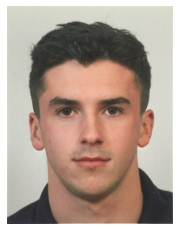

In [146]:
plt.imshow(np.squeeze(content_img)) #np.squeeze remove axis of length 1 Ex : [1, 200, 200, 3] -> [200, 200, 3]
plt.axis('off')
plt.show()

Style image

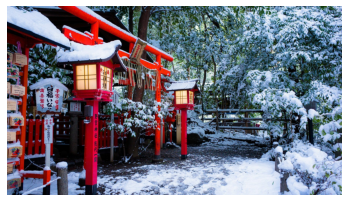

In [147]:
plt.imshow(np.squeeze(style_img))
plt.axis('off')
plt.show()

#Apply the style#

Apply the model

In [152]:
stylized_img = model(tf.constant(content_img), tf.constant(style_img))

Visualizing the result

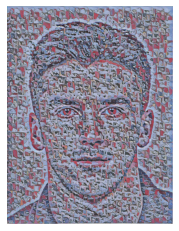

In [153]:
plt.imshow(np.squeeze(stylized_img))
plt.axis('off')
plt.show()

In [150]:
cv2.imwrite('stylized_img.jpg', cv2.cvtColor(np.squeeze(stylized_img)*255, cv2.COLOR_BGR2RGB))

True